# Examples for the code in STMZSpectroscopy.py

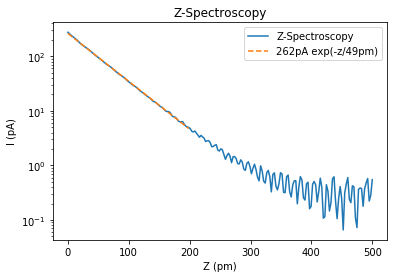

In [8]:
# imports
from NanonisMeasurement import NanZSpectroscopy
from STMZSpectroscopy import STMZSpectroscopy
import matplotlib.pyplot as plt

# load raw data
ZS = NanZSpectroscopy('Example-Data/Z-Spectroscopy.dat')
ZS_IZ = ZS.get_curve('Current (A)',x_unit='pm',y_unit='pA')

# fit exponential decay
fit = STMZSpectroscopy.fit_log_data(ZS_IZ,z_range=(None,200e-12))

# plot
fit.plot()
plt.show()

In [2]:
# print the fit results
fit.print()

result of fitting A*exp(-z/z0)
z0 =   49 +-   0 pm
A  =  262 +-   1 pA


In [3]:
# or access them directly from the fit properties
fit.z0

4.948383911623096e-11

There is a convenience function wrapping the above 5 lines of code into one:

result of fitting A*exp(-z/z0)
z0 =   50 +-   0 pm
A  =  256 +-   2 pA


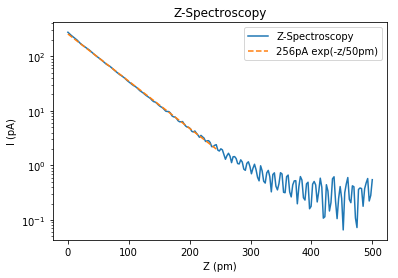

In [4]:
fit, ZS, ZS_IV, fig, ax = STMZSpectroscopy.load_and_fit('Example-Data/Z-Spectroscopy.dat')

If you do not provide a z_range for the fit, the position of the noise floor is determined automatically by simple thresholding.
The threshold below which the signal is considered to be noise can be changed globally by adjusting "STMZSpectroscopy.I_noise_floor". This might be necessary if you use a different amplifier.

result of fitting A*exp(-z/z0)
z0 =   49 +-   0 pm
A  =  265 +-   1 pA


[None, 1.600186875e-10]

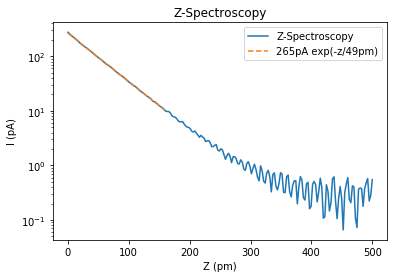

In [5]:
STMZSpectroscopy.I_noise_floor = 10e-12    # set the threshold to 10pA
fit,*_= STMZSpectroscopy.load_and_fit('Example-Data/Z-Spectroscopy.dat')
fit.z_range

## z0 and the work function

There are two simple methods to link the decay length to the workfunction.
In a very simple 1D rectangular barrier model, the decay length for the transmission probability goes as $Z_0^{-1} = 2\sqrt{2m_{\mathrm{e}}\Phi/\hbar^2}$.
Here $m_{\mathrm{e}}$ is the electron mass, $\hbar$ the reduced Plack constant and $\Phi$ the barrier height.

The two functions below make two very crude assumptions: 
- both workfunctions are similar
- the applied bias voltage is small

The barrier height can then be approximiated as $\Phi = (\Phi_{\mathrm{tip}}+\Phi_{\mathrm{sample}}- |e V_{\mathrm{b}}|)/2 $

Let's consider the example of a PtIr tip ($\Phi_{\mathrm{tip}} \approx 5.1$ eV) on a Pb sample ($\Phi_{\mathrm{sample}} \approx 4.05$ eV).

First, we plot z0 as function of the applied bias voltage.

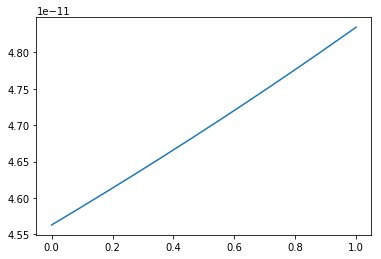

In [6]:
import numpy as np
import matplotlib.pyplot as plt
Vb  = np.linspace(0,1,200)
z0  = STMZSpectroscopy.z0_rectangluar_barrier(5.1,4.05,Vb)
plt.plot(Vb,z0)

Now let us assume we measured a z0 of 45.6pm with the PtIr tip. To estimate the sample work function we do:

In [9]:
STMZSpectroscopy.workfunction_rectangular_barrier(z0=45.6e-12,workfunction_tip=5.1,Vb=5e-3)

4.051429746378599